In [1]:
import torch
print(torch.__version__)

2.7.0+cu118


In [3]:
if torch.cuda.is_available():
    print("CUDA is available")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")

CUDA is available
CUDA version: 11.8
Number of GPUs: 1
Device 0: NVIDIA GeForce RTX 4090


In [5]:
a = torch.empty(2,3)

In [6]:
type(a)

torch.Tensor

In [7]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [8]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [9]:
torch.rand(2,3)

tensor([[0.7470, 0.6212, 0.4064],
        [0.3618, 0.8923, 0.6270]])

In [ ]:
torch.rand(2,3)
## Both time the tensors will be different

tensor([[0.6425, 0.5475, 0.4885],
        [0.7523, 0.2377, 0.7317]])

In [11]:
torch.manual_seed(11)
torch.rand(3,2)

tensor([[0.1490, 0.4866],
        [0.9857, 0.1684],
        [0.5839, 0.6936]])

In [ ]:
torch.manual_seed(11)
torch.rand(3,2)
## if we use manual_seed , random values will be same when generated again

tensor([[0.1490, 0.4866],
        [0.9857, 0.1684],
        [0.5839, 0.6936]])

In [14]:
torch.tensor([[1,2,3],[4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

In [15]:
# other ways

# arange
print("using arange ->", torch.arange(0,10,2))

# using linspace
print("using linspace ->", torch.linspace(0,10,10))

# using eye
print("using eye ->", torch.eye(5))

# using full
print("using full ->", torch.full((3, 3), 5))

using arange -> tensor([0, 2, 4, 6, 8])
using linspace -> tensor([ 0.0000,  1.1111,  2.2222,  3.3333,  4.4444,  5.5556,  6.6667,  7.7778,
         8.8889, 10.0000])
using eye -> tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])
using full -> tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])


In [16]:
x = torch.tensor([[1,2,3],[4,5,6]])
x

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
x.shape
## Sytax same as python

torch.Size([2, 3])

In [19]:
same_as_x = torch.empty_like(x)
same_as_x

tensor([[2592851757808,             0,             0],
        [            0,             0,             0]])

In [20]:
torch.rand_like(x, dtype=torch.float32)

tensor([[0.5831, 0.1284, 0.5721],
        [0.9248, 0.2693, 0.7825]])

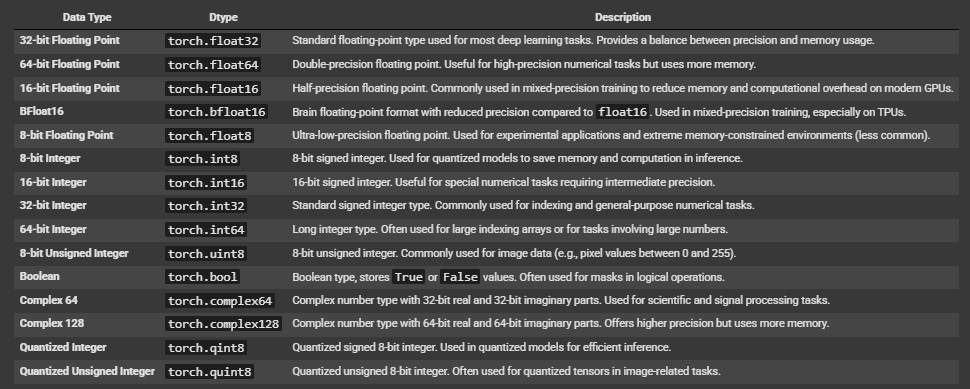

In [21]:
## All mathematical operations can be performed on a tensor with scaler
## Element-wise mathematical ops b/w 2 Tensors also possible
## Sytax just similar as in python 

In [22]:
gpu = torch.device('cuda')

In [23]:
gpu

device(type='cuda')

In [ ]:
import torch
import time

# Set matrix size (you can increase for more noticeable difference)
size = 40000

# Create random matrices
A_cpu = torch.randn(size, size)
B_cpu = torch.randn(size, size)

# ------- CPU computation -------
start_cpu = time.time()
C_cpu = torch.matmul(A_cpu, B_cpu)
end_cpu = time.time()

print(f"CPU Time: {end_cpu - start_cpu:.4f} seconds")

# Move matrices to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
A_gpu = A_cpu.to(device)
B_gpu = B_cpu.to(device)

# Warm-up GPU (optional but recommended to stabilize timing)
_ = torch.matmul(A_gpu, B_gpu)

# ------- GPU computation -------
torch.cuda.synchronize()  # Wait for GPU to finish previous tasks
start_gpu = time.time()
C_gpu = torch.matmul(A_gpu, B_gpu)
torch.cuda.synchronize()  # Wait for GPU computation to finish
end_gpu = time.time()

print(f"GPU Time: {end_gpu - start_gpu:.4f} seconds")


CPU Time: 79.7374 seconds
GPU Time: 3.1142 seconds
